Target variable distribution:
popular
0    465
1     38
Name: count, dtype: int64

Training set size: 402
Testing set size: 101
Class distribution after SMOTE:
0    370
1    370
Name: count, dtype: int64

Model Accuracy: 0.8910891089108911

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        95
           1       0.00      0.00      0.00         6

    accuracy                           0.89       101
   macro avg       0.47      0.47      0.47       101
weighted avg       0.88      0.89      0.89       101

Model saved successfully as 'random_forest_model.pkl'!


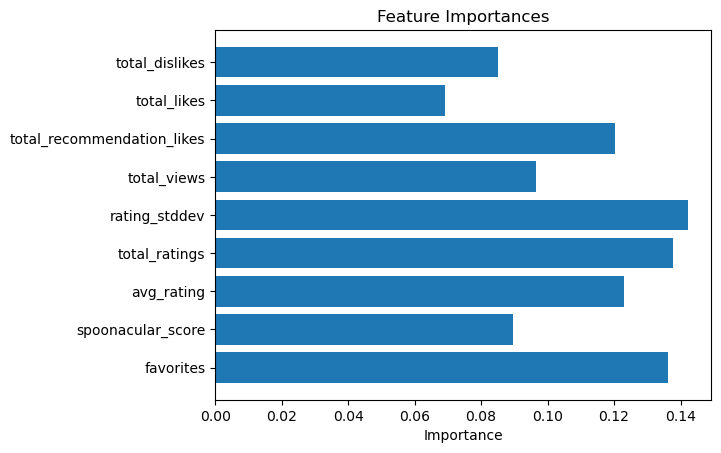

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# Step 1: Load the dataset
combined_data = pd.read_csv("machinelaeringfile.csv")

# Step 2: Define the target variable
combined_data['popular'] = (combined_data['views'] > 2).astype(int)

# Display target variable distribution
print("Target variable distribution:")
print(combined_data['popular'].value_counts())

# Step 3: Handle missing values
count_columns = ['favorites', 'total_views', 'total_recommendation_likes', 'total_likes', 'total_dislikes']
combined_data[count_columns] = combined_data[count_columns].fillna(0)

rating_columns = ['avg_rating', 'rating_stddev']
combined_data[rating_columns] = combined_data[rating_columns].fillna(combined_data[rating_columns].mean())

# Step 4: Split the data
X = combined_data.drop(columns=['recipe_id', 'views', 'popular'])  # Drop irrelevant columns
y = combined_data['popular']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

# Step 5: Apply SMOTE to handle class imbalance
# Step 5: Apply SMOTE to handle class imbalance

# Ensure no missing values in X_train
X_train = X_train.fillna(0)

# Check data types and convert y_train to 1D array if needed
y_train = y_train.values if hasattr(y_train, 'values') else y_train

# Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


# Step 6: Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Save the trained model
joblib.dump(model, "random_forest_model.pkl")
print("Model saved successfully as 'random_forest_model.pkl'!")

# Step 9: Visualize feature importance
feature_importances = model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, feature_importances)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

# Step 10: Use the model to predict on new data
# Uncomment and replace 'new_recipe_data.csv' with your actual dataset
# new_data = pd.read_csv("new_recipe_data.csv")
# new_data = new_data.fillna(0)
# X_new = new_data.drop(columns=['recipe_id'], errors='ignore')
# new_data['predicted_quality'] = model.predict(X_new)
# new_data.to_csv("predicted_recipes.csv", index=False)
# print("Predictions saved to 'predicted_recipes.csv'!")


In [4]:
import pandas as pd
import joblib

# Step 1: Load the new recipe dataset
new_data = pd.read_csv("simulated_new_recipe_data.csv")

# Step 2: Load the trained model
model = joblib.load("random_forest_model.pkl")

# Step 3: Align new data with training columns
# Use the original feature columns from training (replace X_train with your saved columns)
training_columns = X_train.columns  # Ensure this is defined from your training script
X_new = new_data.reindex(columns=training_columns, fill_value=0)

# Step 4: Preprocess the new data (handle missing values)
X_new = X_new.fillna(0)

# Step 5: Make predictions
new_data['predicted_quality'] = model.predict(X_new)

# Step 6: Save the predictions to a CSV file
new_data.to_csv("predicted_recipes.csv", index=False)
print("Predictions saved to 'predicted_recipes.csv'.")


Predictions saved to 'predicted_recipes.csv'.


In [2]:
# Reload new_data from the previously saved CSV
import pandas as pd
new_data = pd.read_csv("predicted_recipes.csv")  # Replace with your actual file path


In [3]:
# Filter recipes with good predicted quality
good_recipes = new_data[new_data['predicted_quality'] == 1]

# Save filtered good recipes to a CSV file
good_recipes.to_csv("filtered_good_recipes.csv", index=False)
print("Good recipes have been filtered and saved to 'filtered_good_recipes.csv'.")


Good recipes have been filtered and saved to 'filtered_good_recipes.csv'.


In [4]:
# Recommend recipes for a specific mood tag (e.g., "Relaxing")
relaxing_recipes = good_recipes[good_recipes['mood_tag'] == 'Relaxing']

# Save relaxing recipes to a CSV file
relaxing_recipes.to_csv("relaxing_recipes.csv", index=False)
print("Relaxing recipes have been saved to 'relaxing_recipes.csv'.")


Relaxing recipes have been saved to 'relaxing_recipes.csv'.


In [5]:
# Calculate average Spoonacular score for good and bad recipes
average_scores = new_data.groupby('predicted_quality')['spoonacular_score'].mean()
print("Average Spoonacular Scores:")
print(average_scores)


Average Spoonacular Scores:
predicted_quality
0    73.683257
1    64.793601
Name: spoonacular_score, dtype: float64


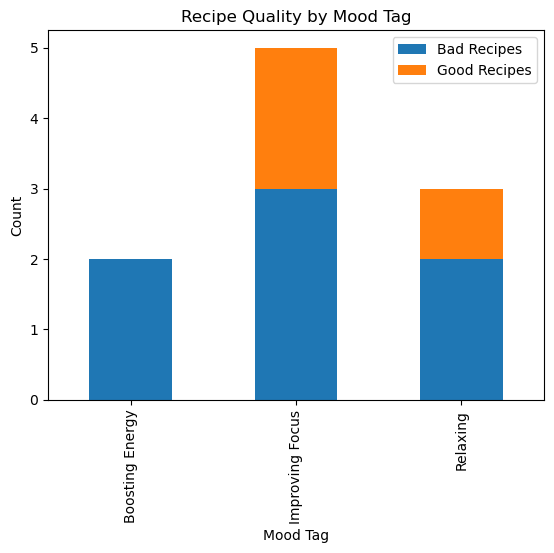

In [6]:
import matplotlib.pyplot as plt

# Plot distribution of good and bad recipes by mood tag
new_data.groupby(['mood_tag', 'predicted_quality']).size().unstack().plot(kind='bar', stacked=True)
plt.title("Recipe Quality by Mood Tag")
plt.xlabel("Mood Tag")
plt.ylabel("Count")
plt.legend(["Bad Recipes", "Good Recipes"])
plt.show()


In [ ]:
2nd dataset 

In [8]:
import pandas as pd

# Load the extended dataset
extended_data_path = "extended_recipe_data.csv"  # Path to your new file
new_data = pd.read_csv(extended_data_path)

# Check the first few rows
print(new_data.head())


   recipe_id  views  favorites  spoonacular_score  avg_rating  total_ratings  \
0       1001    860         52          65.212112    2.198858            264   
1       1002   3772          1          76.237822    3.299821             52   
2       1003   3092         87          71.597251    3.573451             91   
3       1004    466        157          64.561457    1.662576            263   
4       1005   4426         37          80.592645    3.626407             34   

   rating_stddev  total_views  total_recommendation_likes  total_likes  \
0       1.320065          701                          88          343   
1       0.777282          295                          59          128   
2       1.954377          724                          40          491   
3       1.662699          719                          28          135   
4       1.909248          748                          14          471   

   total_dislikes         mood_tag recipe_name  
0              34        

In [9]:
# Preprocess the data
X_new = new_data.drop(columns=['recipe_id', 'views', 'recipe_name', 'mood_tag'], errors='ignore')  # Drop irrelevant columns
X_new = X_new.fillna(0)  # Handle missing values


In [10]:
import joblib

# Load the trained model
model_path = "random_forest_model.pkl"  # Path to your saved model
model = joblib.load(model_path)
print("Model loaded successfully!")


Model loaded successfully!


In [11]:
# Make predictions
new_data['predicted_quality'] = model.predict(X_new)

# Save the predictions to a new CSV file
predicted_file_path = "predicted_recipes.csv"
new_data.to_csv(predicted_file_path, index=False)

print(f"Predictions saved to '{predicted_file_path}'!")


Predictions saved to 'predicted_recipes.csv'!
